In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import matplotlib
import scipy

print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"SciPy version: {scipy.__version__}")

NumPy version: 2.0.1
Matplotlib version: 3.10.5
SciPy version: 1.15.3


In [2]:
# 1. define differential equation of toggle switch
def toggle_switch(t, state, alpha, beta, n):
    """
    parameters:
    t: time
    state: [u, v]
    alpha, beta: the effective synthesis rates
    n: Hill coefficient
    
    returns:
    derivatives: [du/dt, dv/dt]
    """
    u, v = state
    
    # differential equation
    du_dt = alpha / (1 + v**n) - u
    dv_dt = beta / (1 + u**n) - v
    
    return [du_dt, dv_dt]

In [3]:
# 2. parameters and initial conditions
alpha = 5
beta = 5
n = 4
t_span = (0, 50) 
t_eval = np.linspace(0, 50, 1000) 

# initial conditions
initial_condition1 = [4, 0]  # High U, Low V
initial_condition2 = [0, 4]  # Low U, High V

In [4]:
# 3. simulations
sol1 = solve_ivp(toggle_switch, t_span, initial_condition1, 
                 args=(alpha, beta, n), t_eval=t_eval, method='RK45')

sol2 = solve_ivp(toggle_switch, t_span, initial_condition2, 
                 args=(alpha, beta, n), t_eval=t_eval, method='RK45')

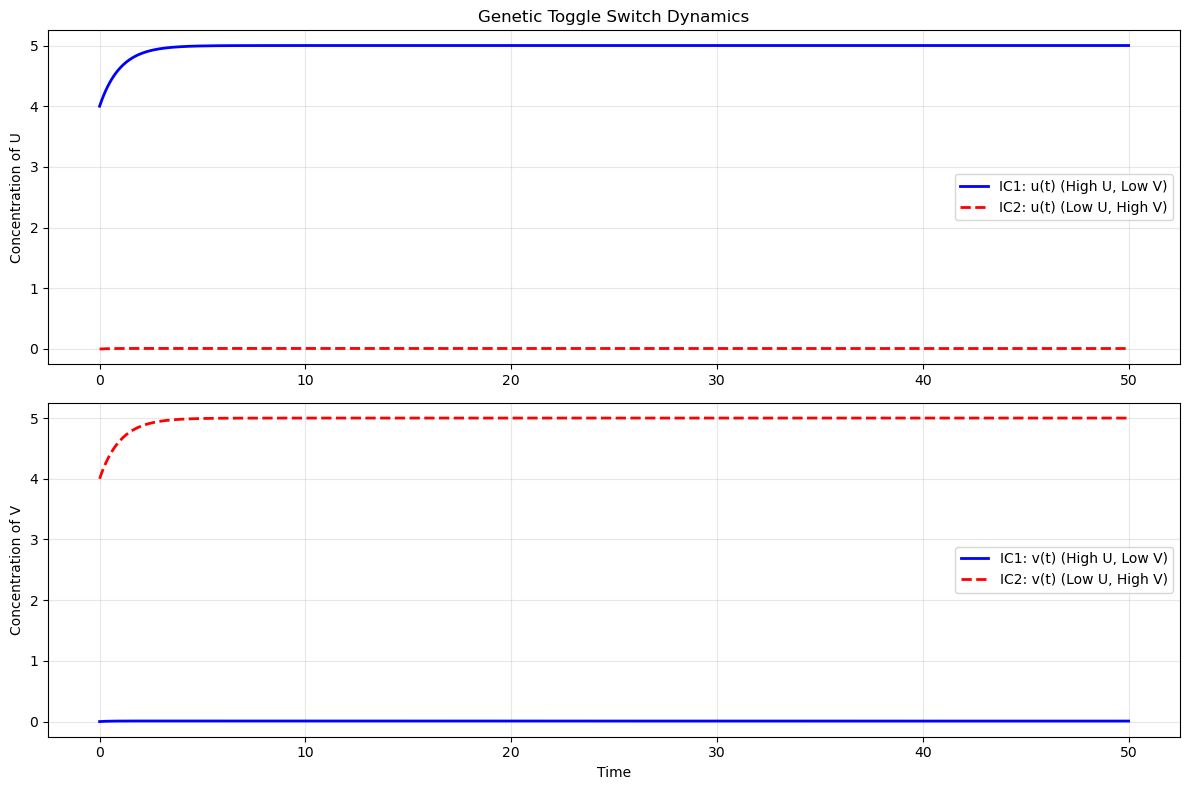

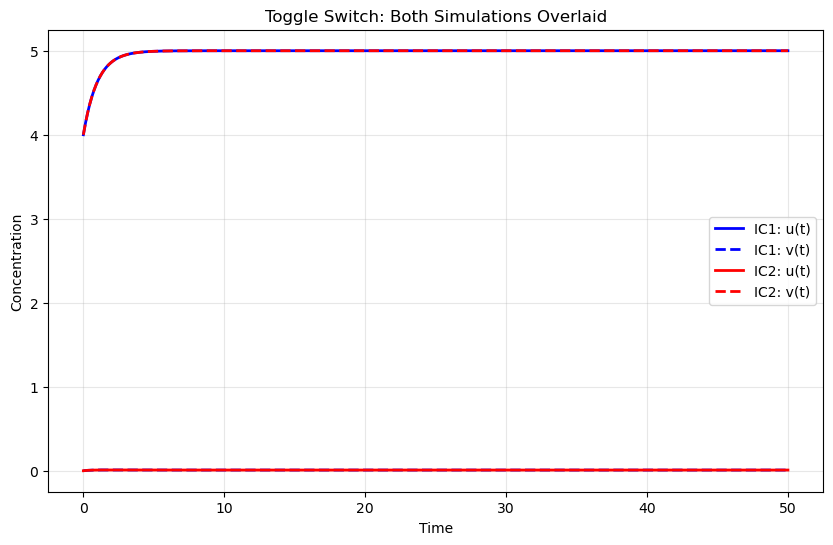

In [5]:
# 4. plotting
plt.figure(figsize=(12, 8))

# plot u(t)
plt.subplot(2, 1, 1)
plt.plot(sol1.t, sol1.y[0], 'b-', linewidth=2, label='IC1: u(t) (High U, Low V)')
plt.plot(sol2.t, sol2.y[0], 'r--', linewidth=2, label='IC2: u(t) (Low U, High V)')
plt.ylabel('Concentration of U')
plt.title('Genetic Toggle Switch Dynamics')
plt.legend()
plt.grid(True, alpha=0.3)

# plotv(t)
plt.subplot(2, 1, 2)
plt.plot(sol1.t, sol1.y[1], 'b-', linewidth=2, label='IC1: v(t) (High U, Low V)')
plt.plot(sol2.t, sol2.y[1], 'r--', linewidth=2, label='IC2: v(t) (Low U, High V)')
plt.xlabel('Time')
plt.ylabel('Concentration of V')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# comparison plot
plt.figure(figsize=(10, 6))
plt.plot(sol1.t, sol1.y[0], 'b-', linewidth=2, label='IC1: u(t)')
plt.plot(sol1.t, sol1.y[1], 'b--', linewidth=2, label='IC1: v(t)')
plt.plot(sol2.t, sol2.y[0], 'r-', linewidth=2, label='IC2: u(t)')
plt.plot(sol2.t, sol2.y[1], 'r--', linewidth=2, label='IC2: v(t)')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Toggle Switch: Both Simulations Overlaid')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Q&A

-  **What do the simulation results show about the long-term behavior of the toggle switch?**
   - Simulation results show that, the system converges to two distinct stable states from different initial conditions. Systems originating from “high U, low V” initial conditions stabilize in a state of high U and low V, while those starting from “low U, high V” initial conditions stabilize in a state of low U and high V.

- **Why is this system considered "bistable"?**
  - This system is called bistable because it has two stable equilibrium points.
  - The system will remain in one state (depending on the initial state) unless subjected to a sufficiently large disturbance that causes it to switch to another state.

- **What do the two different stable states correspond to in terms of which gene is considered "ON" and which is "OFF"?**
  - Initial Condition 1 (High U, Low V)：U is "ON", V is "OFF"
  - Initial Condition 2 (Low U, High V)：U is "OFF", V is "ON"
  - This switch enables mutually exclusive gene expression states and can serve as a binary storage unit (0/1) for synthetic biology circuits.